# A Bayes Net of the Scottish Indicators of Multiple Deprivation Database

## 1. Import libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno # https://github.com/ResidentMario/missingno
import math

In [24]:
np.random.seed(1235) # fix seed for reproducibility

## 2. Load the Data

In [4]:
df = pd.read_csv('data/SIMD/SIMD.csv')

In [5]:
print(df.dtypes[:5]) # to check the type of the column, object = columns with strings there

Data_Zone                 object
Intermediate_Zone         object
Council_area              object
Total_population           int64
Working_Age_population     int64
dtype: object


In [6]:
for col in range(3, df.shape[1]): # iterate over all columns
    if df.iloc[:,col].dtype == object: # if a columns is of object type
        df.iloc[:,col] = df.iloc[:,col].str.replace(r'\%', '').str.replace(r'\*', '') # remove redundant symbols
        df.iloc[:,col] = pd.to_numeric(df.iloc[:,col]).div(100) # divide by 100

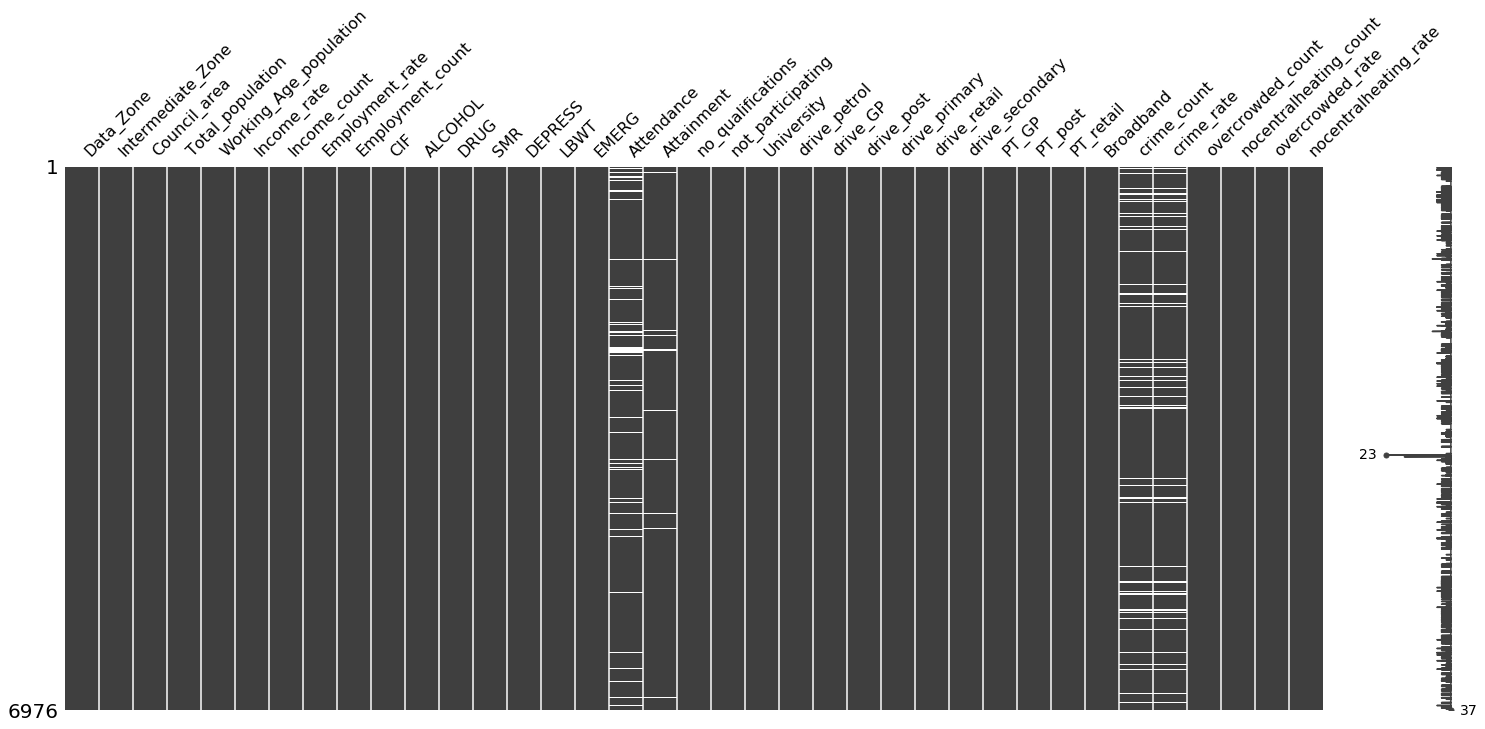

In [7]:
msno.matrix(df) # check how many values are nans

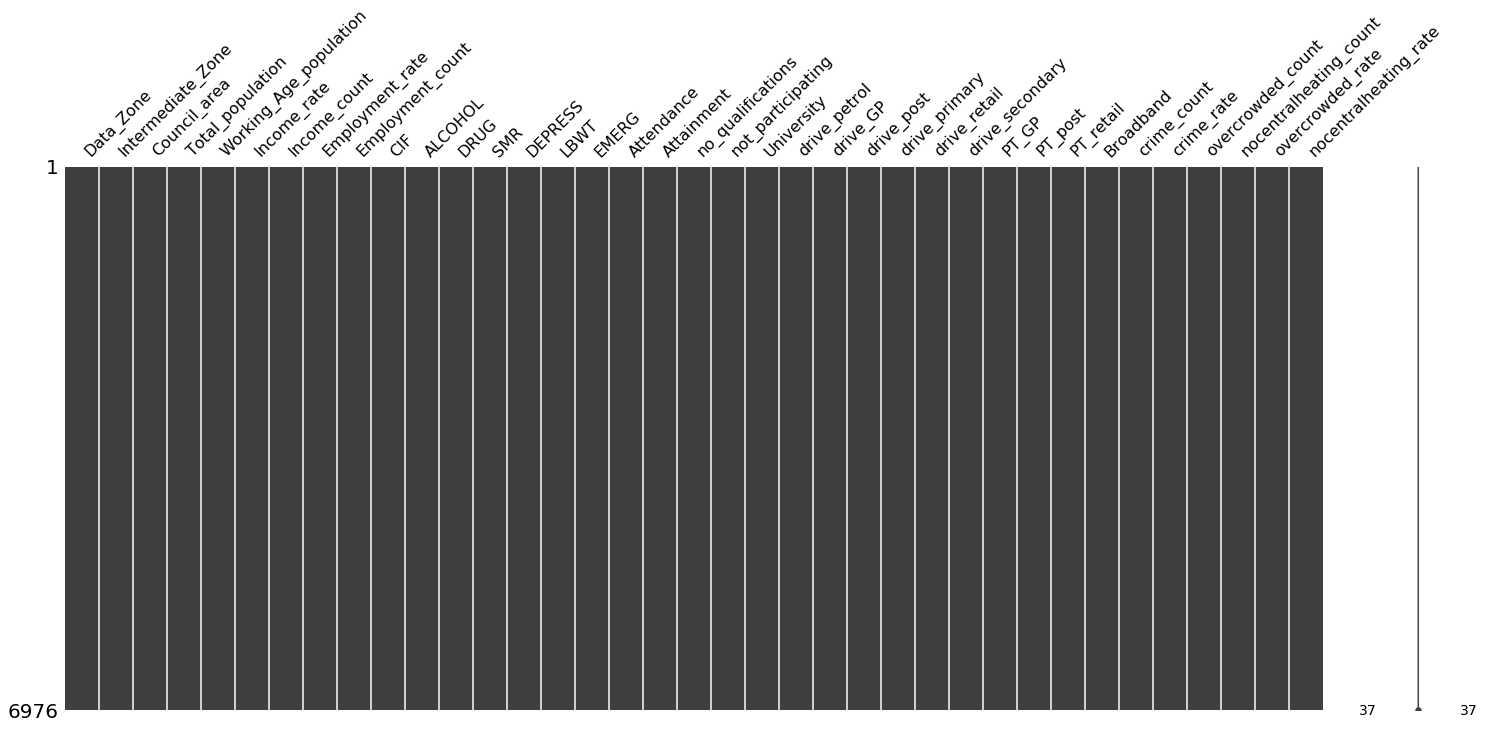

In [8]:
msno.matrix(df.fillna(0)) # let's replace them with 0 and check the visualziataion again
df.fillna(0, inplace=True) # replace nans with 0

## 3. Prepare the Data

In [9]:
df = df.iloc[:, 3:].applymap(lambda x: np.log(x + .0001)) # log transofrmation of all numberic variables

### 3.1 Discretise the Data

In [10]:
edge_list = []
for i in range(3, df.shape[1]):
    edge_list.append(np.histogram_bin_edges(df.iloc[:, i], bins=3))

### 3.5 Recode the Data

In [11]:
def calc_marginals(cutpoints, data):
    # rows are cases, columns are variables
    X_num = data
    # the cutpoints are a list of list
    # outer list is variables, inner list is density cut points
    cutpoints = edge

    lowest = edge[0]
    low = edge[1]
    mid = edge[2]
    high = edge[3]
    C = [0]*3
    for j in range(row):
        if (np.isnan(X_num[j,i])):
            code = np.nan
        else:
            val = float(X_num[j,i])
            if (val < low):
                code = 0
            elif (val < mid):
                code = 1
            else:
                code = 2
        C[code]+=1
    return C

In [15]:
row = df.shape[0]
col = df.shape[1]
X_num = df.iloc[:,3:].values

In [16]:
C_num = np.zeros((row,col-3))

for i in range(col-3):
    edge = edge_list[i]
    print(edge)
    lowest = edge[0]
    low = edge[1]
    mid = edge[2]
    high = edge[3]
    for j in range(row):
        if (np.isnan(X_num[j,i])):
            code = np.nan
        else:
            val = float(X_num[j,i])
            if (val < low):
                code = 0
            elif (val < mid):
                code = 1
            else:
                code = 2
        C_num[j,i]=code

[-9.21034037 -3.97817327  1.25399384  6.48616094]
[-9.21034037 -6.39183019 -3.57332002 -0.75480984]
[-9.21034037 -4.2269625   0.75641537  5.73979323]
[-9.21034037 -4.16905916  0.87222206  5.91350328]
[-9.21034037 -3.66950678  1.87132681  7.4121604 ]
[-9.21034037 -3.63693254  1.93647529  7.50988312]
[-9.21034037 -3.90217003  1.40600031  6.71417065]
[-9.21034037 -6.39183019 -3.57332002 -0.75480984]
[-9.21034037 -6.37120931 -3.53207826 -0.6929472 ]
[-9.21034037 -4.14390636  0.92252765  5.98896167]
[-9.21034037e+00 -6.14019358e+00 -3.07004679e+00  9.99950003e-05]
[-9.21034037 -7.03192661 -4.85351286 -2.6750991 ]
[1.09864562 2.68791986 4.2771941  5.86646834]
[-9.21034037 -6.37120931 -3.53207826 -0.6929472 ]
[-9.21034037 -6.20633658 -3.20233279 -0.19832899]
[-0.41379555  1.11535933  2.6445142   4.17366908]
[-0.57886293  1.11171253  2.80228799  4.49286345]
[-0.43008256  0.77178156  1.97364568  3.1755098 ]
[-0.0607575   1.09195893  2.24467535  3.39739178]
[-0.24141644  1.58806391  3.41754425  

In [17]:
# There are 561 two-way combinations of this data
# There are 5984 three-way combinations of this data

## 4. Create Useful Functions for Tabulation and Information

In [18]:
import math
def tabulate(x,y):
    z = np.zeros((3,3),dtype=int)
    for i in range(len(x)):

        
        if (math.isnan(x[i])| math.isnan(y[i]) ):
            next
            
        else:
            val1 = int(x[i])
            val2 = int(y[i])
            z[val1,val2]+=1

    return z

def tabulate_data(x1,y1,C):
    x = C_num[:,x1]
    y = C_num[:,y1]
    z = np.zeros((3,3),dtype=int)
    for i in range(len(x)):

        
        if (math.isnan(x[i])| math.isnan(y[i]) ):
            next
            
        else:
            val1 = int(x[i])
            val2 = int(y[i])
            z[val1,val2]+=1

    return z

def joint_prob(z):
    T = np.sum(z)
    z = z/T
    return z

In [19]:
import collections as c
cntr = c.Counter(C_num[:,28])
# cntr.most_common()

In [20]:
T01 = tabulate(C_num[:,0],C_num[:,1]) 
T02 = tabulate(C_num[:,0],C_num[:,2]) 
T28_13 = tabulate(C_num[:,28],C_num[:,13]) 
T28_14 = tabulate(C_num[:,28],C_num[:,14]) 
T14_4 = tabulate(C_num[:,14],C_num[:,4])

In [21]:
print(T28_13)
print(T28_14)
print(T14_4)

[[ 156  225  290]
 [  85  114  170]
 [1259 1575 3102]]
[[   2  142  527]
 [   0   77  292]
 [  37 1370 4529]]
[[   2    0   37]
 [   2    2 1585]
 [  69  116 5163]]


In [25]:
C_num.shape

(6976, 31)

In [26]:
print(T01) # val1 is on the rows, val2 is on the columns 

[[   6    6    0]
 [   0    0    0]
 [  13  801 6150]]


In [27]:
P01 = joint_prob(T01)
P02 = joint_prob(T02)
print(P02)

[[4.30045872e-04 5.73394495e-04 7.16743119e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.43348624e-04 1.72018349e-03 9.96416284e-01]]


In [28]:
# These results show that where there is low population, there is low numbers of workers
# Where there are medium numbers of population, there will be low to medium numbers of workers
# Where there are high numbers of population, there will be medium to high numbers of workers
# The data is skewed by a few large numbers, and is rather poorly discretised.

In [29]:
def mutual_information(P):
    x = P.sum(axis=0)
    y = P.sum(axis=1)
    #print(x)
    #print(y)
    I=0
    for i in range(3):
        for j in range(3):
            xy = P[i,j]
            I += xy*np.log(xy/(x[i]*y[j]))
    return I

In [30]:
I01=mutual_information(P01+.0000001)
I02=mutual_information(P02+.0000001)
print(I01)
print(I02)
# Population is not strongly related to work force
# Population is strongly related to income

1.5088346059365716
0.026922694196200296


In [31]:
def calc_all(x,y):
    table = tabulate_data(x,y,C_num)
    prob = joint_prob(table)
    minfo = mutual_information(prob+.000001)
    return minfo

## 5. Create a Bayes Net

In [32]:
# Use the Chow-Liu algorithm
# Find the mutual information between all pairs of variables
all_mi = []
MI = np.zeros((34,34))
for i in range(33):
    for j in range(i+1,34):
        minfo = calc_all(i,j)
        print(i,j,minfo**.2)
        MI[i,j]=minfo**.2
        MI[j,i]=minfo**.2
        all_mi.append(minfo**.2)

0 1 1.0443755357463218
0 2 0.46461078556091745
0 3 0.3407219955157781
0 4 0.6962203609667789
0 5 1.0262188616250925
0 6 0.3204323080828926
0 7 1.3756155993491652
0 8 1.12754501453027
0 9 0.3381546906750451
0 10 0.7937375466172923
0 11 0.5901487934239426
0 12 1.3374058765164156
0 13 1.3504774166617393
0 14 1.213008317326486
0 15 1.6822557343898155
0 16 1.6924005638553006
0 17 1.6603187009727425
0 18 1.6873016674512533
0 19 1.672583732044162
0 20 1.6728106109110028
0 21 1.691219210354365
0 22 1.6353030723254953
0 23 1.695795085659142
0 24 1.4388930764023378
0 25 1.5384983260783198
0 26 1.2476811384708206
0 27 0.44548811809197575
0 28 0.9836587863777833
0 29 1.096708095853721
0 30 1.4204021876983859


IndexError: index 31 is out of bounds for axis 1 with size 31

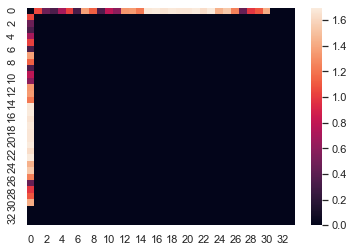

In [33]:
import seaborn as sns; sns.set()
%matplotlib inline
sns.heatmap(MI)

In [34]:
print(MI)

[[0.         1.04437554 0.46461079 ... 0.         0.         0.        ]
 [1.04437554 0.         0.         ... 0.         0.         0.        ]
 [0.46461079 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [35]:
# items 13 and 14 are related to everything else
# That's depression (DEPRESS) and low birth weight (LBW)
# Then items 6 and 10 are drawn in income (Income_count) and alcohol (ALCOHOL)
j = 0
for i in header:
    k = (j-3)
    if (k >= 0):
        print(k,i)
    j+=1

NameError: name 'header' is not defined

In [36]:
# Okay, let's make a connected graph
sort = sorted(all_mi, reverse=True)

In [37]:
all_nodes = {}
all_tuples = []
for val in sort:
    print(val)
    for i in range(34):
        for j in range(i+1,34):
            if (MI[i,j] > val):
                if (i in all_nodes):
                    next
                else:
                    all_nodes[i] = 0
                    atuple = {i,j}
                    all_tuples.append(atuple)
                if (j in all_nodes):
                    next
                else:
                    all_nodes[j] = 0  
                    atuple = (i,j)
                    all_tuples.append(atuple)
                # found maximum value
                # put the two nodes in the list

1.695795085659142
1.6924005638553006
1.691219210354365
1.6873016674512533
1.6822557343898155
1.6728106109110028
1.672583732044162
1.6603187009727425
1.6353030723254953
1.5384983260783198
1.4388930764023378
1.4204021876983859
1.3756155993491652
1.3504774166617393
1.3374058765164156
1.2476811384708206
1.213008317326486
1.12754501453027
1.096708095853721
1.0443755357463218
1.0262188616250925
0.9836587863777833
0.7937375466172923
0.6962203609667789
0.5901487934239426
0.46461078556091745
0.44548811809197575
0.3407219955157781
0.3381546906750451
0.3204323080828926


In [38]:
# the first two items are duplicated / equivalent
print(all_tuples)

[{0, 23}, (0, 23), (0, 16), (0, 21), (0, 18), (0, 15), (0, 20), (0, 19), (0, 17), (0, 22), (0, 25), (0, 24), (0, 30), (0, 7), (0, 13), (0, 12), (0, 26), (0, 14), (0, 8), (0, 29), (0, 1), (0, 5), (0, 28), (0, 10), (0, 4), (0, 11), (0, 2), (0, 27), (0, 3), (0, 9)]


In [39]:
# This should be converted to a directed graph and displayed. 
# You do that by choosing a theoretically founded root note. I'd argue for node 28. 

In [40]:
# There is strong evidence that putting at risk kids together increases crime rates. 
# Further there is evidence that school segregation leads to poor attainment and university attendance.

# Billings, S. B., D. J. Deming and J. Rockoff (2014). "School Segregation, Educational Attainment, 
# and Crime: Evidence from the End of Busing in Charlotte-Mecklenburg." Quarterly Journal of Economics 
# 129(1): 435-476.

# Segregation is not listed in the SIMD.
